<a href="https://colab.research.google.com/github/SheilaMumbi/Emobilis-Project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CARDIO GUARD**

The dataset contains health data from 4,240 individuals, including 16 variables. Key features include age, gender, smoking status, cholesterol, blood pressure, BMI, and history of conditions like stroke, hypertension, and diabetes. The target variable is whether the individual developed coronary heart disease (CHD) within 10 years (1 = Yes, 0 = No). This data is used to predict heart disease risk based on lifestyle and health factors.

# **Importing Libraries**

In [29]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [3]:
# dataset
disease_df = pd.read_csv("/content/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

print(disease_df.head(), disease_df.shape)

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [4]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   int64  
 3   cigsPerDay       4211 non-null   float64
 4   BPMeds           4187 non-null   float64
 5   prevalentStroke  4240 non-null   int64  
 6   prevalentHyp     4240 non-null   int64  
 7   diabetes         4240 non-null   int64  
 8   totChol          4190 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4221 non-null   float64
 12  heartRate        4239 non-null   float64
 13  glucose          3852 non-null   float64
 14  TenYearCHD       4240 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 497.0 KB


# **Exploratory data analysis**

In [5]:
# removing NaN / NULL values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

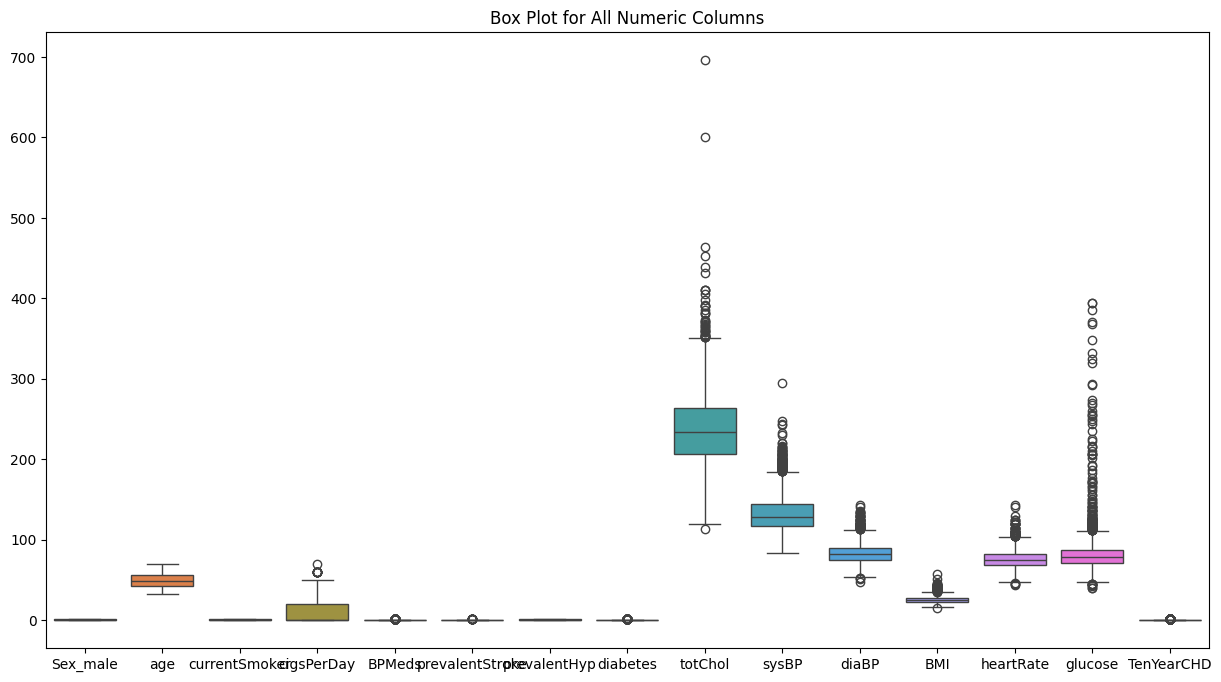

In [33]:
# Handling outliers
# Plot box plots to identify outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=disease_df)
plt.title('Box Plot for All Numeric Columns')
plt.show()

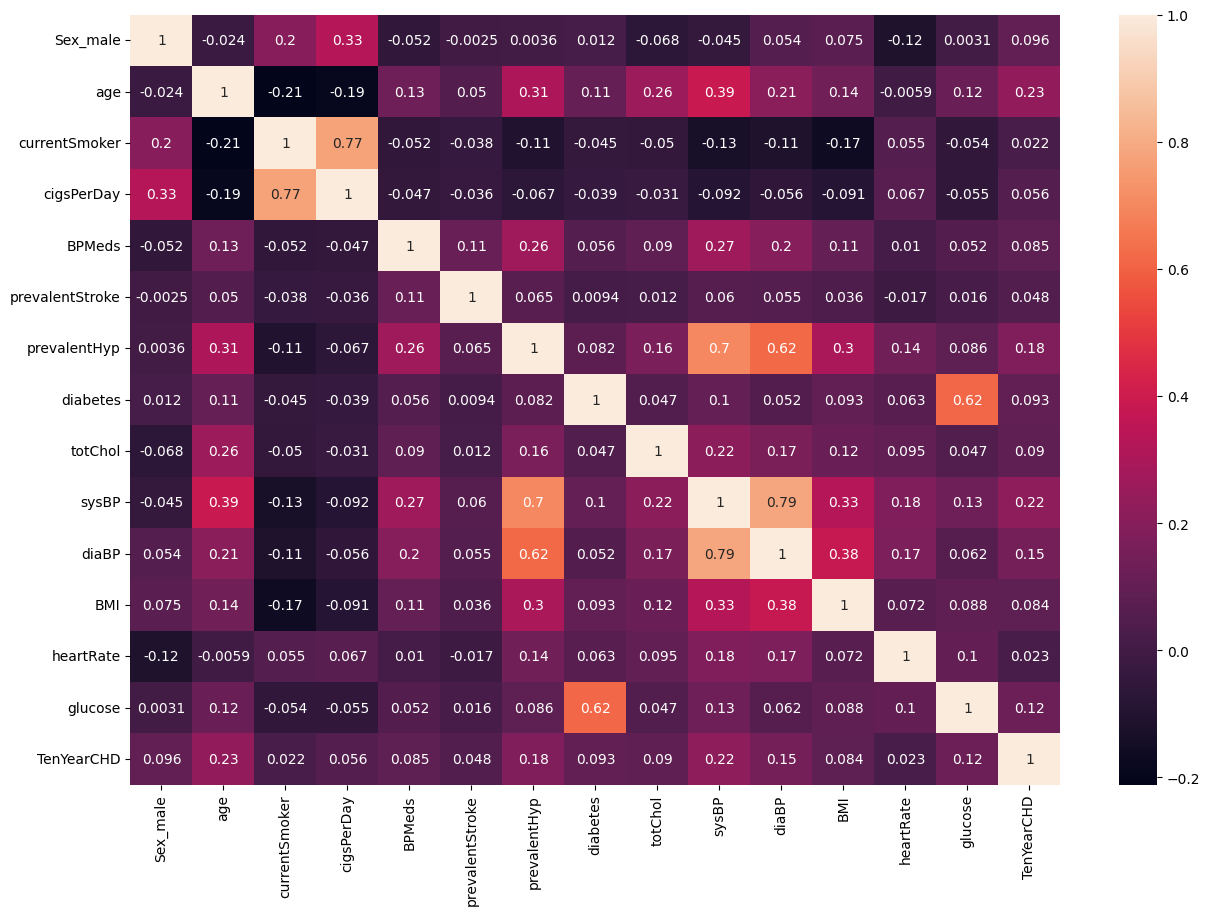

In [6]:
# correlation heatmap

plt.figure(figsize = (15, 10))
sns.heatmap(disease_df.corr(), annot = True)
plt.show()

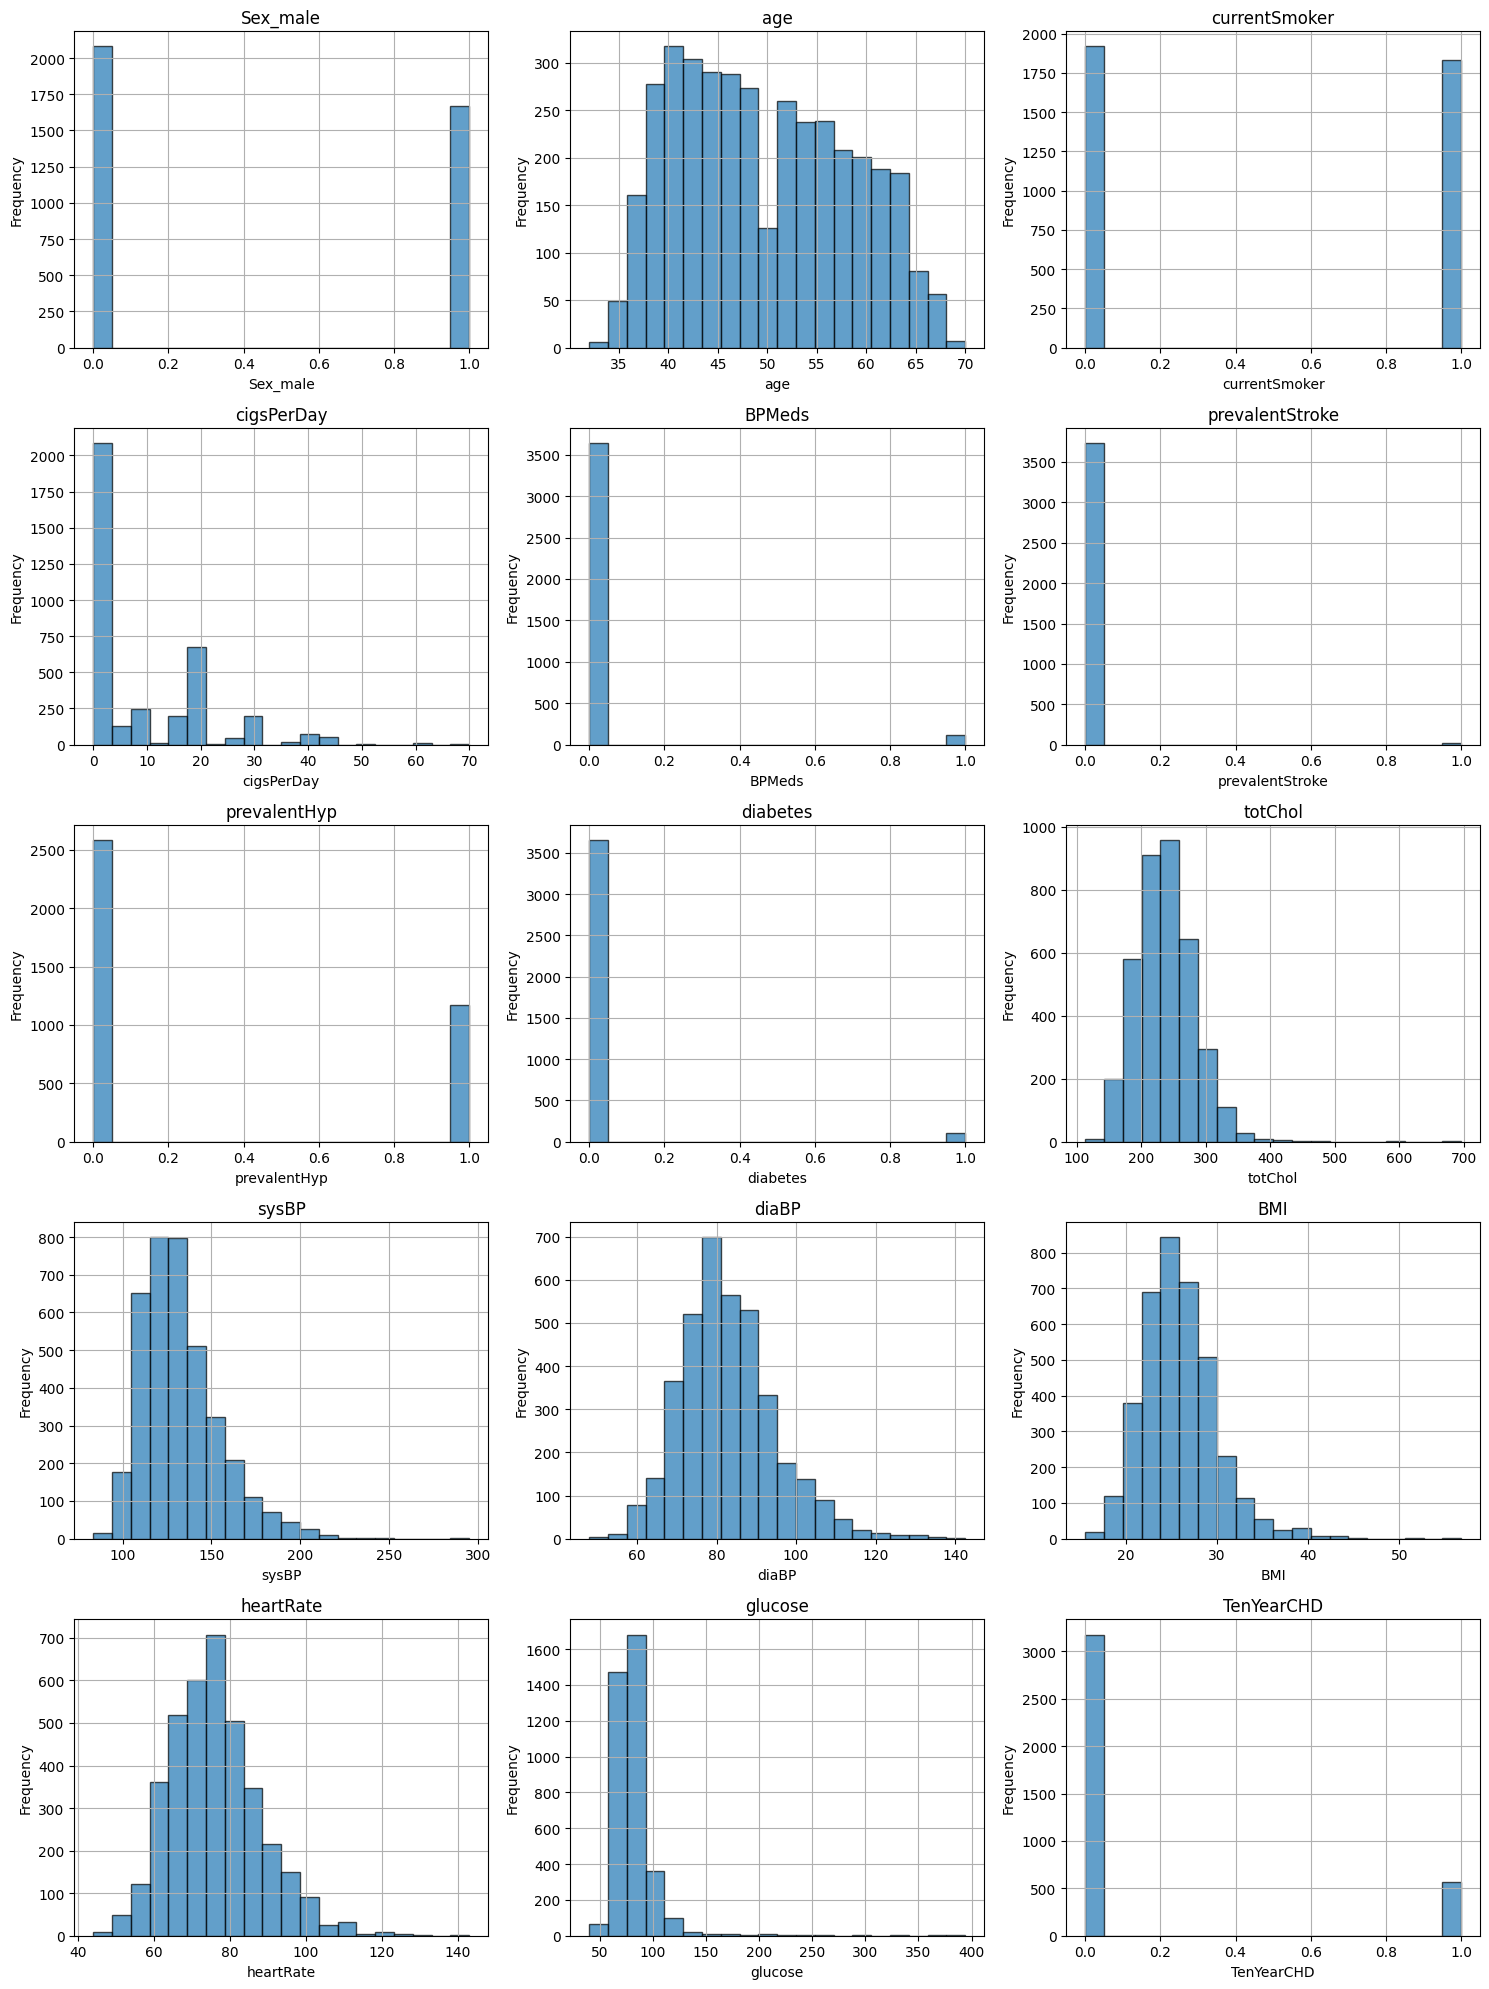

In [37]:
columns_to_plot = [
    'Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
    'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
    'glucose', 'TenYearCHD'
]

# Plot histograms for the selected columns
plt.figure(figsize=(15, 20))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 3, i)
    disease_df[column].dropna().hist(bins=20, edgecolor='black', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


1. Total Cholesterol (totChol): This continuous variable usually has a
right-skewed distribution. Most people cluster around healthy cholesterol levels, but outliers can indicate high cholesterol.

2. Systolic and Diastolic Blood Pressure (sysBP, diaBP): These two histograms illustrate blood pressure levels. They provide insights into whether most people in the dataset fall within normal, pre-hypertensive, or hypertensive ranges.

3. BMI: Typically has a right-skewed distribution, with most values clustering in the healthy-to-overweight range.

4. Heart Rate: Shows the variability in resting heart rates, often clustering around 60–100 beats per minute.

5. Glucose: Displays blood glucose levels, with potential peaks for normal and elevated levels.

6. Ten-Year CHD: The outcome variable, showing whether individuals developed coronary heart disease (1) or not (0).

In [7]:
disease_df.columns

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# **TRAINING THE MODEL**

In [8]:
y = np.asarray(disease_df['TenYearCHD'])

# normalization of the dataset
scaled_cols = disease_df[["age", "cigsPerDay", "totChol", "sysBP", "glucose", "diaBP", "heartRate"]]


# X = preprocessing.StandardScaler().fit(X).transform(X)

X = preprocessing.StandardScaler().fit_transform(scaled_cols)


# Train-and-Test -Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 4)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2625, 7) (2625,)
Test set: (1126, 7) (1126,)


<ipython-input-9-84bd52ad0a09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


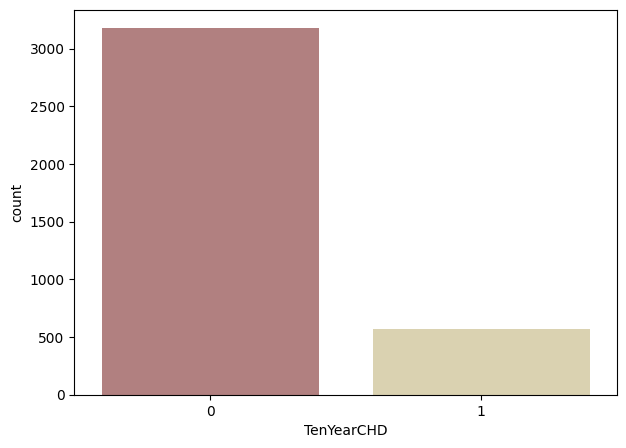

In [9]:
# counting no. of patients affected with CHD
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="pink")
plt.show()

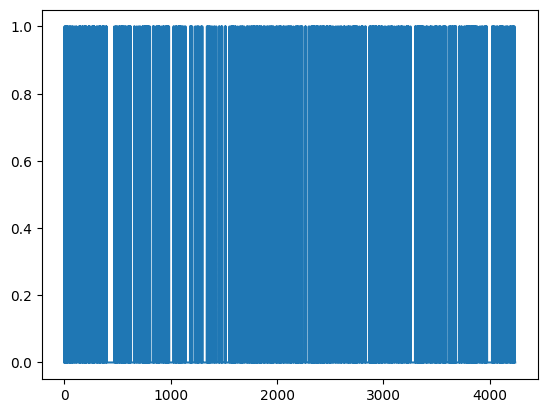

In [10]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [12]:
# Evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8525754884547069


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

y = np.asarray(disease_df['TenYearCHD'])
X = preprocessing.StandardScaler().fit_transform(scaled_cols)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       622
           1       0.19      0.17      0.18       129

    accuracy                           0.74       751
   macro avg       0.51      0.51      0.51       751
weighted avg       0.72      0.74      0.73       751



In [14]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = preprocessing.StandardScaler().fit_transform(scaled_cols)
y = np.asarray(disease_df['TenYearCHD'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    criterion='gini',  # Splitting criterion ('gini' or 'entropy')
    max_depth=None,    # Maximum depth of the tree (None = no limit)
    random_state=42    # Ensures reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       622
           1       0.28      0.04      0.07       129

    accuracy                           0.82       751
   macro avg       0.55      0.51      0.48       751
weighted avg       0.74      0.82      0.76       751



              precision    recall  f1-score   support

           0       0.84      0.99      0.91       622
           1       0.64      0.05      0.10       129

    accuracy                           0.83       751
   macro avg       0.74      0.52      0.50       751
weighted avg       0.80      0.83      0.77       751

[[618   4]
 [122   7]]


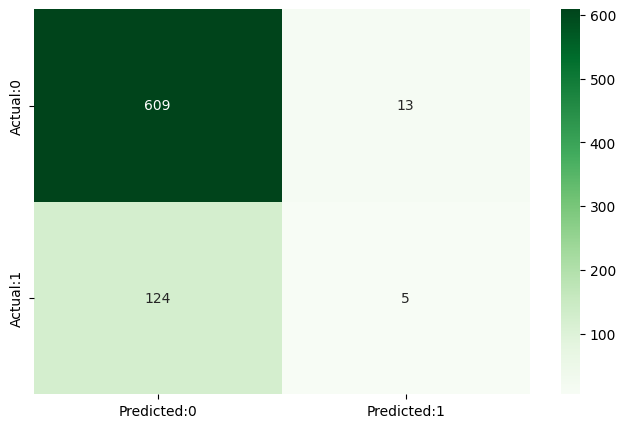

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       622
           1       0.28      0.04      0.07       129

    accuracy                           0.82       751
   macro avg       0.55      0.51      0.48       751
weighted avg       0.74      0.82      0.76       751



In [15]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
y_test_pred = logreg.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid
params = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', None]}

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Grid search
grid = GridSearchCV(estimator=logreg, param_grid=params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model and parameters
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Save the model
import joblib
joblib.dump(best_model, "/content/logreg_chd_model.pkl")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

Best Parameters: {'C': 0.01, 'penalty': None}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

['/content/logreg_chd_model.pkl']

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions on the test set
y_test_pred = best_model.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Accuracy: 0.8322237017310253

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       622
           1       0.60      0.07      0.12       129

    accuracy                           0.83       751
   macro avg       0.72      0.53      0.52       751
weighted avg       0.80      0.83      0.77       751


Confusion Matrix:
 [[616   6]
 [120   9]]


In [18]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [26]:
pip install google-generativeai

In [19]:
%%writefile app.py

Writing app.py


In [30]:
! wget -q -O - ipv4.icanhazip.com

34.19.21.208


In [31]:
! streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.19.21.208:8501

your url is: https://busy-facts-rhyme.loca.lt
2024-12-17 08:30:02.200 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 08:30:46.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 08:31:31.280 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-17 08:35:08.901 Uncaught app execution
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)